In [1]:
%load_ext autoreload
%autoreload 2

from rBergomi import roughBergomi
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '/Users/tk/Documents/GitHub/Speciale/deep_learning')
from BlackScholes import *

### Effect of H

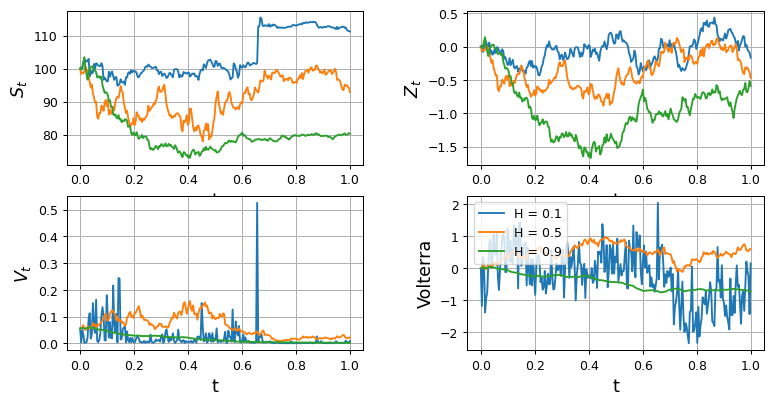

In [44]:
h = np.array([0.1, 0.5, 0.9])
s, z, v, volt = {}, {}, {}, {}

for i, H in zip(range(3), h):
    model = roughBergomi(n_paths = 1, n_steps = 253, H = 0.1+i*0.4, spot = 100, eta=2.1)
    volterra, W, dW = model.simulate_paths()
    V = model.simulate_V(volterra)
    S = model.simulate_S(V,dW)
    s['H={}'.format(H)] = S
    volt['H={}'.format(H)] = volterra
    z['H={}'.format(H)] = W
    v['H={}'.format(H)] = V

t = np.linspace(0, model.T, model.s + 1)

fig, ax = plt.subplots(2, 2, squeeze=False, dpi=90)
fig.set_size_inches(10, 5)
fig.subplots_adjust(wspace=0.35)

for H in h:
    ax[0,0].plot(t, s['H={}'.format(H)].T, label = 'H = {}'.format(H))
ax[0,0].set_ylabel(r'$ S_t$', fontsize=14)
ax[0,0].set_xlabel('t', fontsize=14)

for H in h:
    ax[0,1].plot(t, z['H={}'.format(H)].T,  label = 'H = {}'.format(H))
ax[0,1].set_ylabel(r'$Z_t$', fontsize=14)
ax[0,1].set_xlabel('t', fontsize=14)

for H in h:
    ax[1,0].plot(t, v['H={}'.format(H)].T,  label = 'H = {}'.format(H))
ax[1,0].set_ylabel(r'$V_t$', fontsize=14)
ax[1,0].set_xlabel('t', fontsize=14)

for H in h:
    ax[1,1].plot(t, volt['H={}'.format(H)].T,  label = 'H = {}'.format(H))
ax[1,1].set_ylabel('Volterra', fontsize=14)
ax[1,1].set_xlabel('t', fontsize=14)

ax[0,0].grid(True)
ax[0,1].grid(True)
ax[1,0].grid(True)
ax[1,1].grid(True)

plt.legend(loc='upper left')

plt.show()

### Implied volatility

In [608]:
H = 0.07
eta = 1.9
rho = -0.9

K = np.arange(75, 125, 1)
T = [1/12, 1/4, 0.5, 1]
IV = {}

for ttm in T:

    model = roughBergomi(n_paths = 100000, n_steps = 253, H = H, eta = eta, rho = rho, spot = 100, T = ttm)
    volterra, W, dW = model.simulate_paths()
    V = model.simulate_V(volterra)
    S = model.simulate_S(V,dW)

    impVol, p = [], []
    for strike in K:

        price = model.call_price(S, strike = strike)
        p.append(price)

        try:
            
            iv = bsImpVol(price, model.spot, strike, model.T)

        except:

            iv = np.nan

        impVol.append(iv)

    IV['impVol_{}'.format(ttm)] = impVol

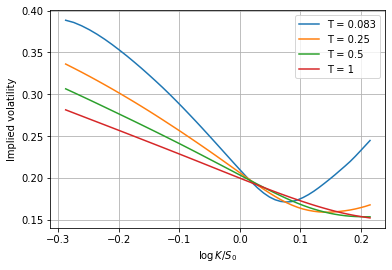

In [609]:
k = np.log(K/model.spot)
for ttm in T:   
    plt.plot(k, IV['impVol_{}'.format(ttm)], label = 'T = {}'.format(round(ttm,3)))
plt.grid(True)
plt.xlabel(r'$\log{K/S_0}$')
plt.ylabel('Implied volatility')
plt.legend()
plt.show()

### Volterra and variance process

In [2]:
model = roughBergomi(n_paths = 100000, n_steps = 253, spot=100.0, strike=100.0)
volterra, W, dW = model.simulate_paths()
V = model.simulate_V(volterra)
S = model.simulate_S(V,dW)
t = np.linspace(0, model.T, model.s + 1)

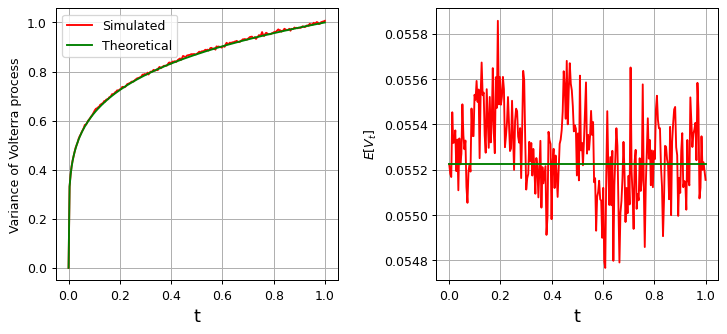

In [636]:
fig, ax = plt.subplots(1, 2, squeeze=False, dpi=90)
fig.set_size_inches(9.5, 4)
fig.subplots_adjust(wspace=0.35)
ax[0,0].plot(t, np.var(volterra, axis=0), 'r', label='Simulated')
ax[0,0].plot(t, t**(2*(model.H-0.5) + 1), 'g', label='Theoretical')
ax[0,0].set_ylabel('Variance of Volterra process', fontsize=10)
ax[0,0].set_xlabel('t', fontsize=14)
ax[0,1].plot(t, np.mean(V, axis=0), 'r', label='Simulated')
ax[0,1].plot(t, model.xi * np.ones_like(t), 'g', label='Theoretical')
ax[0,1].set_ylabel(r'$E[ V_t ]$', fontsize=10)
ax[0,1].set_xlabel('t', fontsize=14)
ax[0,0].grid(True)
ax[0,1].grid(True)
ax[0,0].legend()
plt.show()

### Asset price

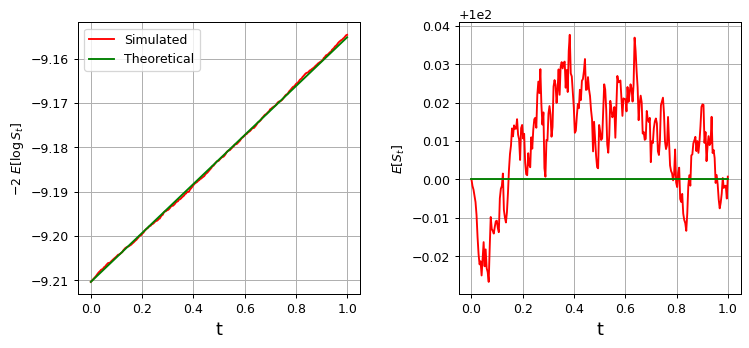

In [637]:
fig, ax = plt.subplots(1, 2, squeeze=False, dpi=90)
fig.set_size_inches(9.5, 4)
fig.subplots_adjust(wspace=0.35)
ax[0,0].grid(True)
ax[0,1].grid(True)
ax[0,0].plot(t, -2*np.mean(np.log(S), axis=0), 'r', label='Simulated')
ax[0,0].plot(t, model.xi * t - 2* np.log(model.spot), 'g', label='Theoretical')
ax[0,0].set_ylabel(r'$-2\ E[ \log S_t ]$', fontsize=10)
ax[0,0].set_xlabel('t', fontsize=14)
ax[0,1].plot(t, np.mean(S, axis=0), 'r', label='Simulated')
ax[0,1].plot(t, np.repeat(model.spot, t.shape[0]), 'g', label='Theoretical')
ax[0,1].set_ylabel(r'$E[ S_t ]$', fontsize=10)
ax[0,1].set_xlabel('t', fontsize=14)
ax[0,0].legend()
plt.show()

### Paths

In [675]:
model = roughBergomi(n_paths = 3, n_steps = 253, spot=100.0, strike=100.0, eta=1)
volterra, W, dW = model.simulate_paths()
V = model.simulate_V(volterra)
S = model.simulate_S(V,dW)

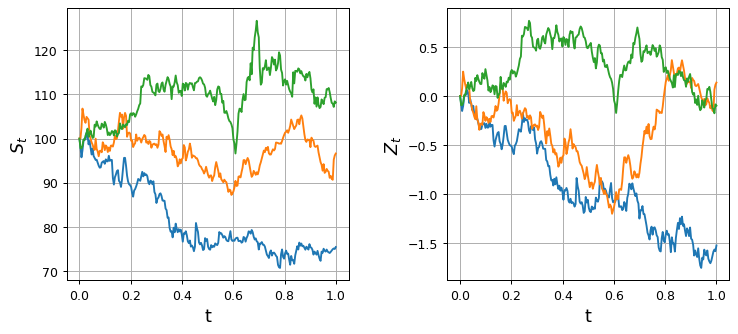

In [676]:
fig, ax = plt.subplots(1, 2, squeeze=False, dpi=90)
fig.set_size_inches(9.5, 4)
fig.subplots_adjust(wspace=0.35)
ax[0,0].plot(t, S.T)
ax[0,0].set_ylabel(r'$ S_t$', fontsize=14)
ax[0,0].set_xlabel('t', fontsize=14)
ax[0,1].plot(t, W.T)
ax[0,1].set_ylabel(r'$Z_t$', fontsize=14)
ax[0,1].set_xlabel('t', fontsize=14)
ax[0,0].grid(True)
ax[0,1].grid(True)
plt.show()

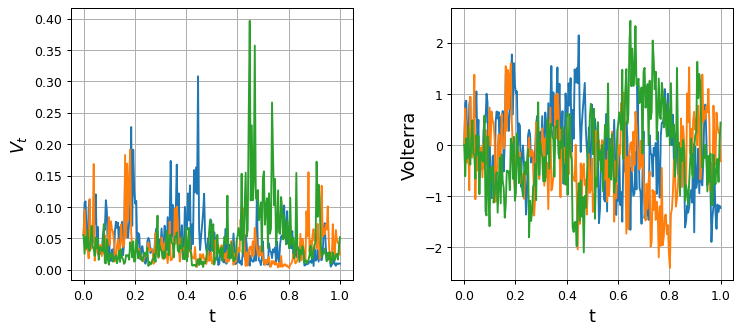

In [677]:
fig, ax = plt.subplots(1, 2, squeeze=False, dpi=90)
fig.set_size_inches(9.5, 4)
fig.subplots_adjust(wspace=0.35)
ax[0,0].plot(t, V.T)
ax[0,0].set_ylabel(r'$V_t$', fontsize=14)
ax[0,0].set_xlabel('t', fontsize=14)
ax[0,1].plot(t, volterra.T)
ax[0,1].set_ylabel('Volterra', fontsize=14)
ax[0,1].set_xlabel('t', fontsize=14)
ax[0,0].grid(True)
ax[0,1].grid(True)
plt.show()

### Monce carlo precision

In [616]:
paths = [1000, 1000000]
spot, price, delta = {}, {}, {}

for n in paths:
    print('Number of paths: ', n)
    model = roughBergomi(n_paths=n, strike = 100.0)
    volterra, W, dW = model.simulate_paths()
    V = model.simulate_V(volterra)
    S = model.simulate_S(V,dW)
    spot['spots_{}'.format(n)], price['prices_{}'.format(n)], delta['deltas{}'.format(n)] = model.test(V, dW, upper=35, lower=165, n=100)

Number of paths:  1000


Simulating test set:   0%|          | 0/100 [00:00<?, ?it/s]

Number of paths:  1000000


Simulating test set:   0%|          | 0/100 [00:00<?, ?it/s]

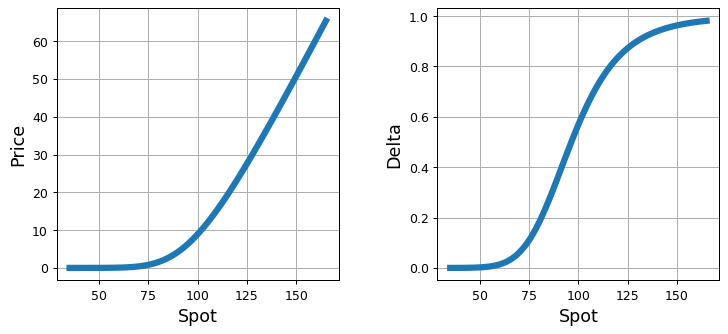

In [617]:
fig, ax = plt.subplots(1, 2, squeeze=False, dpi=90)
fig.set_size_inches(9.5, 4)
fig.subplots_adjust(wspace=0.35)
ax[0,0].grid(True)
ax[0,1].grid(True)
ax[0,0].plot(spot['spots_1000000'], price['prices_1000000'], linewidth=5)
ax[0,0].set_ylabel('Price', fontsize=14)
ax[0,0].set_xlabel('Spot', fontsize=14)
ax[0,1].plot(spot['spots_1000000'], delta['deltas1000000'], linewidth=5)
ax[0,1].set_ylabel('Delta', fontsize=14)
ax[0,1].set_xlabel('Spot', fontsize=14)
plt.show()

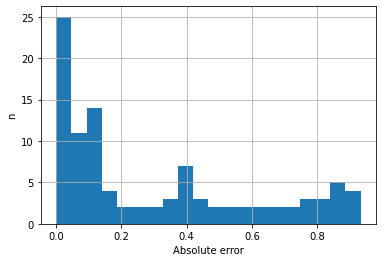

In [618]:
res = abs(price['prices_1000000'] - price['prices_1000'])
plt.hist(res, bins=20)
plt.ylabel('n')
plt.xlabel('Absolute error')
plt.grid(True)
plt.show()

### Asian options and locally floored, capped cliquets

In [619]:
model = roughBergomi(n_paths=1000000, strike = 100.0)
volterra, W, dW = model.simulate_paths()
V = model.simulate_V(volterra)
S = model.simulate_S(V,dW)

In [620]:
c_spots, c_prices, c_deltas = model.cliquet_test(V, dW, floor=-0.01, cap=0.01, lower=0, upper=0.15, n=100)
a_spots, a_prices, a_deltas = model.asian_test(V, dW, upper=35, lower=165, n=100)

Simulating test set:   0%|          | 0/100 [00:00<?, ?it/s]

Simulating test set:   0%|          | 0/100 [00:00<?, ?it/s]

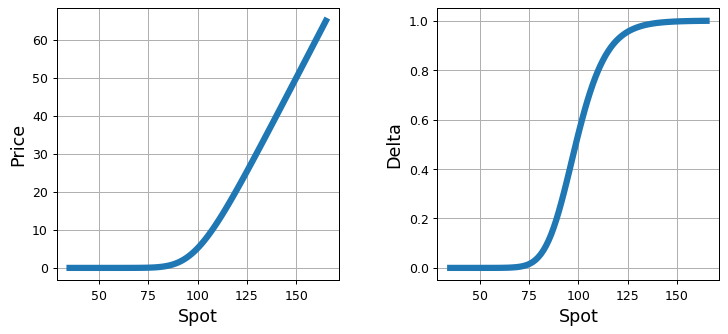

In [621]:
fig, ax = plt.subplots(1, 2, squeeze=False, dpi=90)
fig.set_size_inches(9.5, 4)
fig.subplots_adjust(wspace=0.35)
ax[0,0].grid(True)
ax[0,1].grid(True)
ax[0,0].plot(a_spots, a_prices, linewidth=5)
ax[0,0].set_ylabel('Price', fontsize=14)
ax[0,0].set_xlabel('Spot', fontsize=14)
ax[0,1].plot(a_spots, a_deltas, linewidth=5)
ax[0,1].set_ylabel('Delta', fontsize=14)
ax[0,1].set_xlabel('Spot', fontsize=14)
plt.show()

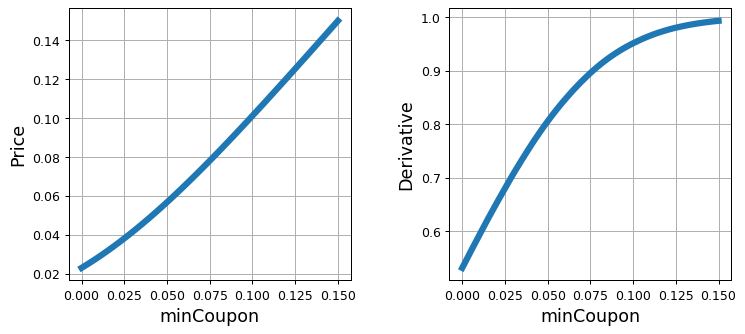

In [622]:
fig, ax = plt.subplots(1, 2, squeeze=False, dpi=90)
fig.set_size_inches(9.5, 4)
fig.subplots_adjust(wspace=0.35)
ax[0,0].grid(True)
ax[0,1].grid(True)
ax[0,0].plot(c_spots, c_prices, linewidth=5)
ax[0,0].set_ylabel('Price', fontsize=14)
ax[0,0].set_xlabel('minCoupon', fontsize=14)
ax[0,1].plot(c_spots, c_deltas, linewidth=5)
ax[0,1].set_ylabel('Derivative', fontsize=14)
ax[0,1].set_xlabel('minCoupon', fontsize=14)
plt.show()

### AAD vs. theoritcal pathwise deltas for European options

In [623]:
model = roughBergomi(n_paths=10000)
volterra, W, dW = model.simulate_paths()
V = model.simulate_V(volterra)
S = model.simulate_S(V,dW)
model.spots = np.repeat(1.0, 10000)
spots, prices, aad_deltas = model.payoff_delta(V, dW)
terminal_S = S[:,model.s]
theoretical_deltas = np.where(terminal_S >= model.strike, terminal_S/model.spot, 0)
res = abs(aad_deltas - theoretical_deltas.reshape(-1,1))

Simulating training set:   0%|          | 0/10000 [00:00<?, ?it/s]

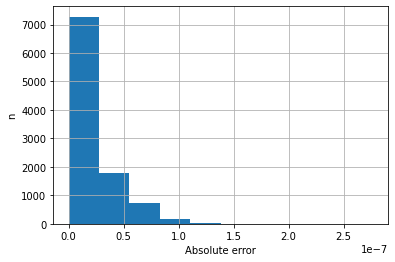

In [624]:
plt.hist(res)
plt.xlabel('Absolute error')
plt.ylabel('n')
plt.grid(True)
plt.show()